In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
x = np.zeros(10, dtype = int)
x[4] = 1

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [18]:
np.random.seed(12)
x = np.random.random(10)
x[::-1]

array([0.13720932, 0.95694934, 0.03342143, 0.90071485, 0.91874701,
       0.01457496, 0.53373939, 0.26331502, 0.7400497 , 0.15416284])

In [24]:
np.arange(9).reshape((3,3))

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [25]:
x = np.zeros((8,8),dtype=int)
x[1::2,::2] = 1
x[::2,1::2] = 1
print(x)

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


In [37]:
np.random.seed(1123)
z = np.random.random(size=(10, 2))
x,y = z[:,0], z[:,1]
r = np.sqrt(x**2+y**2)
t = np.arctan2(y,x)
print(r)
print(t)

[0.97655991 0.42273912 0.64526011 0.82611291 0.42630218 0.85586875
 0.99613185 0.79260457 0.47333914 0.9392569 ]
[1.24300277 0.13472936 0.14583076 0.8973307  0.59242116 0.14158074
 0.41122286 0.08847496 1.35690889 0.11923218]


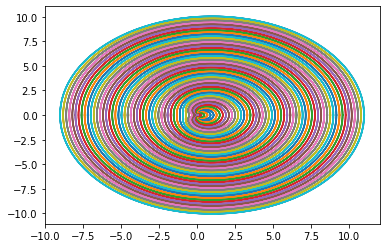

In [5]:
a = np.linspace(-10, 10, 100)
phi = np.linspace(-2*np.pi, 2*np.pi, num = 100)
for i in a:
    r = i + np.cos(phi)
    x = r * np.cos(phi)
    y = r * np.sin(phi)
    plt.plot(x, y)
plt.show()

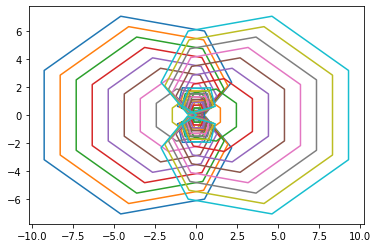

In [8]:
phi = np.linspace(-2*np.pi, 2*np.pi, 20)
a = np.linspace(-10,10, num = 20)
phi = phi[np.where(phi != 0.)]
for i in a:
    r = i * np.sin(phi) / phi
    x = r * np.cos(phi)
    y = r * np.sin(phi)
    plt.plot(x, y)
plt.show()

# Monte Carlo

In [9]:
import numpy as np

M1_val = 400000
M1_std = 500
M2_val = 300000
M2_std = 1000
r_val = 3.2
r_std = 0.01
M1 = np.random.normal(M1_val, M1_std, 1000000)
M2 = np.random.normal(M2_val, M2_std, 1000000)
r = np.random.normal(r_val, r_std, 1000000)

G = 6.67384*10**-11

In [10]:
F = G*M1*M2/r**2

In [11]:
import numpy as np
M1M2G = M1_val*M2_val*G
stdM1M2G = M1M2G*(np.power(M1_std/M1_val,2) + np.power(M2_std/M2_val,2))
print(stdM1M2G)

0.00010149798333333336


In [12]:
rr =  np.power(3.2, 2)
stdrr = abs(r_val**2*2*r_std/r_val)
print(stdrr)

0.064


In [13]:
f = M1M2G/rr
stdf = f*np.abs(np.power(stdrr/rr,2) + np.power(stdM1M2G/M1M2G,2))
print(f, '+-', stdf)

0.7820906249999999 +- 3.055054065878605e-05


In [14]:
F_gauss = np.random.normal(f, stdf, 1000000)

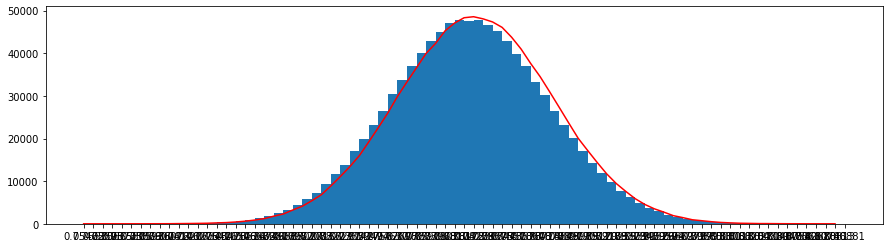

In [15]:
x = F
hist, bins = np.histogram(x, bins=80)
hist_2, bins_2 = np.histogram(F_gauss, bins=80)
width = np.diff(bins)
center = (bins[:-1] + bins[1:]) / 2
fig, ax = plt.subplots(figsize=(15,4))
ax.bar(center, hist, align='center', width=width)
ax.set_xticks(bins)
plt.plot(bins[:len(bins_2)-1], hist_2,color='r')
#fig.savefig("/tmp/out.png")
plt.show()

In [16]:
M1_val = 400000
M1_std = 20000
M2_val = 300000
M2_std = 100000
r_val = 3.2
r_std = 1
M1 = np.random.normal(M1_val, M1_std, 1000000)
M2 = np.random.normal(M2_val, M2_std, 1000000)
r = np.random.normal(r_val, r_std, 1000000)

G = 6.67384*10**-11

In [17]:
F = G*M1*M2/r**2

In [18]:
M1M2G = M1_val*M2_val*G
stdM1M2G = M1M2G*(np.power(M1_std/M1_val,2) + np.power(M2_std/M2_val,2))
print(stdM1M2G)

0.9098668533333334


In [19]:
rr =  np.power(3.2, 2)
stdrr = abs(r_val**2*2*r_std/r_val)
print(stdrr)

6.400000000000001


In [20]:
f = M1M2G/rr
stdf = f*np.abs(np.power(stdrr/rr,2) + np.power(stdM1M2G/M1M2G,2))
print(f, '+-', stdf)

0.7820906249999999 +- 0.3155989730635127


In [21]:
F_gauss = np.random.normal(f, stdf, 1000000)

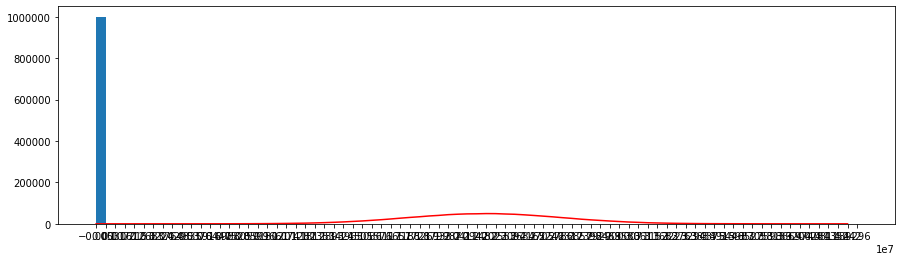

In [22]:
x = F
hist, bins = np.histogram(x, bins=80)
hist_2, bins_2 = np.histogram(F_gauss, bins=80)
width = np.diff(bins)
center = (bins[:-1] + bins[1:]) / 2
fig, ax = plt.subplots(figsize=(15,4))
ax.bar(center, hist, align='center', width=width)
ax.set_xticks(bins)
plt.plot(bins[:len(bins_2)-1], hist_2,color='r')
#fig.savefig("/tmp/out.png")
plt.show()